In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Customer Data_cleaning and Basic EDA

In [4]:
# Load raw customer dataset
df1=pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\Raw_dataset\Customers.csv",encoding='ISO-8859-1')

In [6]:
df1

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [8]:
# check the datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [10]:
#check for missing values
df1.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [12]:
#handling missing values
df1['State Code'] = df1['State Code'].fillna('Unknown')

In [14]:
#Reviewing for Missing Data
df1.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [16]:
#check for duplicates
duplicate_count = df1.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [18]:
#removing unwanted columns
df1.drop(columns=["State Code","Zip Code"],inplace=True)

In [20]:
#changing datatypes
df1['Birthday'] = pd.to_datetime(df1['Birthday'], format="%m/%d/%Y", errors='coerce').dt.date
df1['Birthday'] = pd.to_datetime(df1['Birthday'], errors='coerce')

In [22]:
df1["Birthday"]

0       1939-07-03
1       1979-09-27
2       1947-05-26
3       1957-09-17
4       1965-11-19
           ...    
15261   1936-03-25
15262   1992-02-16
15263   1937-11-09
15264   1937-10-12
15265   1965-08-18
Name: Birthday, Length: 15266, dtype: datetime64[ns]

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State        15266 non-null  object        
 5   Country      15266 non-null  object        
 6   Continent    15266 non-null  object        
 7   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 954.3+ KB


In [26]:
#summary statistics for customer data
df1.describe()

,CustomerKey,Birthday
count,1.526600e+04,15266
mean,1.060508e+06,1968-09-20 13:51:07.050962920
min,3.010000e+02,1935-02-03 00:00:00
25%,5.140335e+05,1952-02-10 06:00:00
50%,1.079244e+06,1968-07-25 12:00:00
75%,1.593980e+06,1985-06-09 18:00:00
max,2.099937e+06,2002-02-18 00:00:00
std,6.127097e+05,NaN


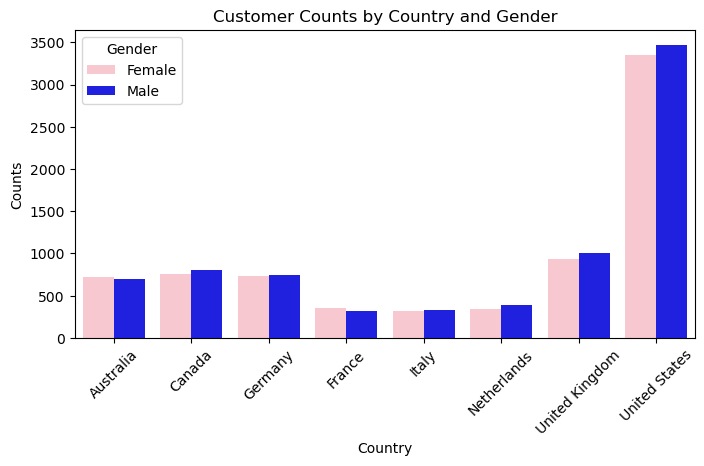

In [28]:
# visualizing Gender Breakdown of Customers Across Different Countries
# Define custom colors for Gender
custom_palette = {'Male': 'blue', 'Female': 'pink'}

plt.figure(figsize=(8,4))
sns.countplot(x='Country', data=df1, hue='Gender', palette=custom_palette)
plt.xlabel("Country")
plt.ylabel("Counts")
plt.title("Customer Counts by Country and Gender")
plt.xticks(rotation=45) # Rotate x labels for better readability
plt.legend(title='Gender') # Adding a legend for clarity on gender
plt.show()

In [30]:
# Calculate Age
df1['Age'] = (pd.to_datetime('today') - df1['Birthday']).dt.days // 365


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State        15266 non-null  object        
 5   Country      15266 non-null  object        
 6   Continent    15266 non-null  object        
 7   Birthday     15266 non-null  datetime64[ns]
 8   Age          15266 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.0+ MB


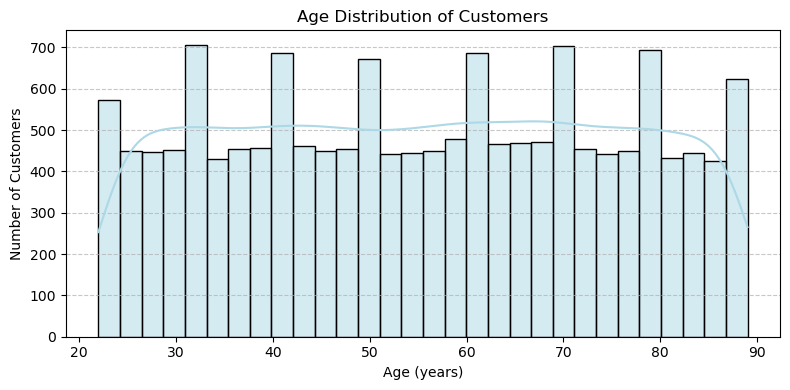

In [34]:
#histogram showing the age distribution of customers
plt.figure(figsize=(8, 4))
sns.histplot(df1['Age'], bins=30, kde=True, color='lightblue', edgecolor='black')
plt.title("Age Distribution of Customers")
plt.xlabel("Age (years)")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  # Adjust layout
plt.show()

In [36]:
#Saving the cleaned dataset to new csv_file
df1.to_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\cleaned_customers.csv", index=False)

### Exchange_rates Data_cleaning and Basic EDA

In [39]:
# Load raw Exchange_Rates dataset
df2=pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\Raw_dataset\Exchange_Rates.csv",encoding='ISO-8859-1')

In [41]:
df2

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [43]:
# check the datatypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [45]:
#check for missing values
df2.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [47]:
#check for duplicates
duplicate_count = df2.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [49]:
#changing datatypes
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')

In [51]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11215 non-null  datetime64[ns]
 1   Currency  11215 non-null  object        
 2   Exchange  11215 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 263.0+ KB


,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415


In [53]:
#renamming column 
df2=df2.rename(columns={'Exchange':'exr'})

In [55]:
df2.describe()

,Date,exr
count,11215,11215.000000
mean,2018-01-26 00:00:00,1.061682
min,2015-01-01 00:00:00,0.628500
25%,2016-07-14 00:00:00,0.857800
50%,2018-01-26 00:00:00,1.000000
75%,2019-08-10 00:00:00,1.311900
max,2021-02-20 00:00:00,1.725300
std,NaN,0.245519


In [57]:
#Saving the cleaned dataset to new csv_file
df2.to_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\cleaned_exchange.csv", index=False)

### Products Dataset Cleaning and Basic EDA

In [60]:
df3=pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\Raw_dataset\Products.csv")

In [62]:
df3

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [64]:
#check for data type
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [66]:
#check for missing value
df3.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [68]:
#check for Duplicates
duplicates = df3.duplicated().sum()
print(f'Total duplicates found: {duplicates}')

Total duplicates found: 0


In [70]:
# drop the column
df3.drop(["SubcategoryKey"],axis=1,inplace=True)

In [72]:
df3.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,MP4&MP3,1,Audio


In [74]:
#changing datatypes
df3["Unit Cost USD"] = df3["Unit Cost USD"].str.replace("$", "").str.replace(",", "")
df3["Unit Cost USD"] = df3["Unit Cost USD"].astype(float)

In [76]:
df3["Unit Price USD"] = df3["Unit Price USD"].str.replace("$", "").str.replace(",", "")
df3["Unit Price USD"] = df3["Unit Price USD"].astype(float)

In [78]:
df3=df3.rename(columns={'Unit Cost USD':'Unit_Cost_USD','Unit Price USD':'Unit_Price_USD','Product Name':'Product_Name'})

In [80]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product_Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit_Cost_USD   2517 non-null   float64
 5   Unit_Price_USD  2517 non-null   float64
 6   Subcategory     2517 non-null   object 
 7   CategoryKey     2517 non-null   int64  
 8   Category        2517 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 177.1+ KB


In [82]:
#smmary statistics for products data
df3.describe()

,ProductKey,Unit_Cost_USD,Unit_Price_USD,CategoryKey
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,1259.000000,147.655562,356.830131,4.878824
std,726.739637,184.373683,494.054962,2.299170
min,1.000000,0.480000,0.950000,1.000000
25%,630.000000,32.250000,69.000000,3.000000
50%,1259.000000,86.670000,199.990000,4.000000
75%,1888.000000,183.950000,410.000000,8.000000
max,2517.000000,1060.220000,3199.990000,8.000000


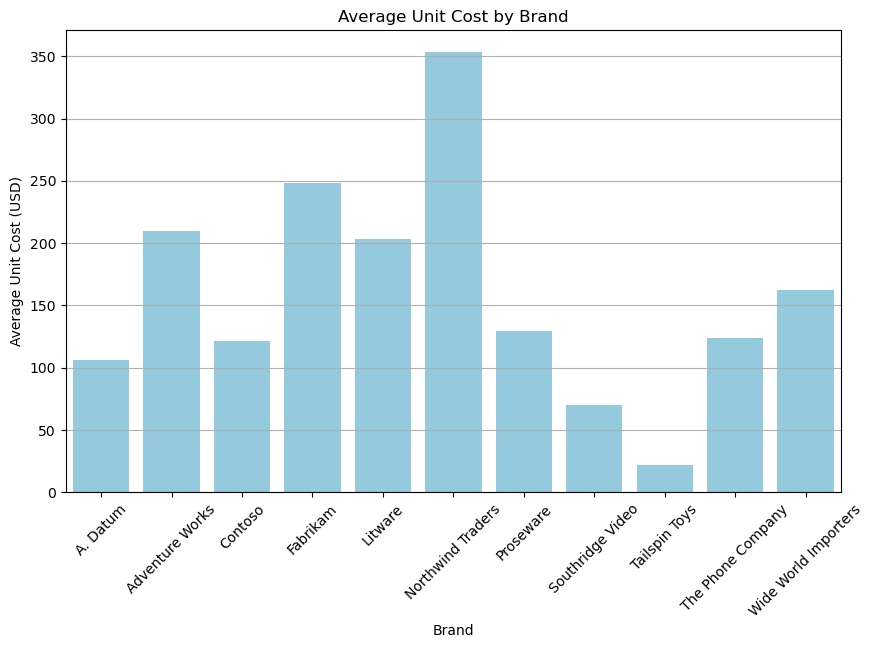

In [84]:
# Calculate average unit cost by brand
average_cost_by_brand = df3.groupby('Brand')['Unit_Cost_USD'].mean().reset_index()
#plot a graph that shows the average unit cost by brand
plt.figure(figsize=(10,6))
sns.barplot(data=average_cost_by_brand, x='Brand', y='Unit_Cost_USD', color='skyblue')  
plt.title('Average Unit Cost by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Unit Cost (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

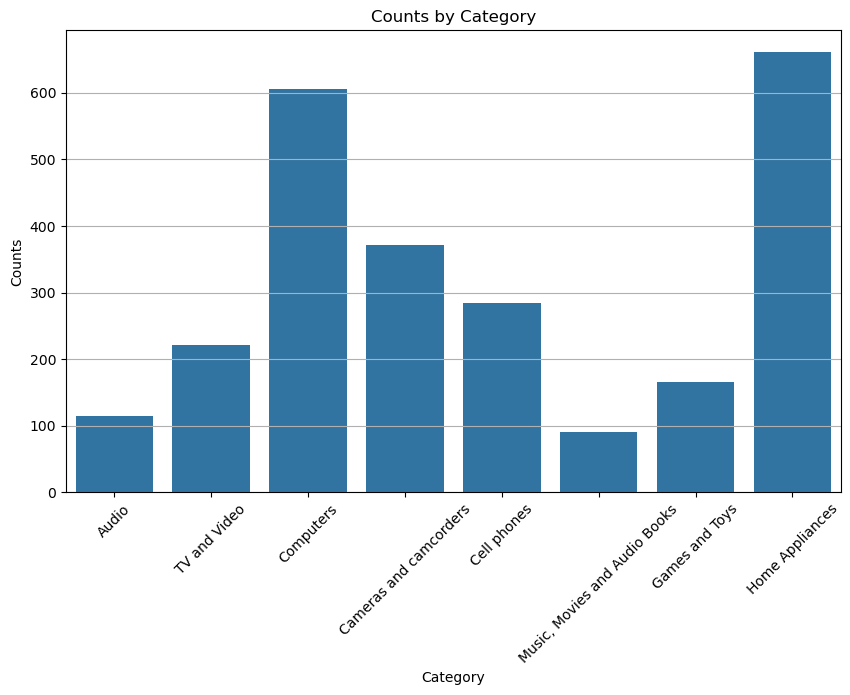

In [86]:
# Create the count plot for Comparison of Categories

plt.figure(figsize=(10, 6))
sns.countplot(x="Category", data=df3)
plt.xlabel("Category")
plt.ylabel("Counts")
plt.title("Counts by Category")
plt.xticks(rotation=45)  # Rotate x labels if there are many categories
plt.grid(axis='y') 
plt.show()

In [88]:
#Saving the cleaned dataset to new csv_file
df3.to_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\cleaned_products.csv", index=False)

## Stores Dataset cleaning and basic EDA

In [91]:
df4=pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\Raw_dataset\Stores.csv")

In [93]:
df4

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [95]:
# check the datatypes
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [97]:
#check for missing values
df4.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [99]:
df4.dropna(inplace=True)

In [101]:
#reviewing for null values
df4.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

In [103]:
#check for duplicates
duplicates = df4.duplicated().sum()
print(f'Total duplicates found: {duplicates}')

Total duplicates found: 0


In [105]:
#changing data type
df4['Open Date'] = pd.to_datetime(df4['Open Date'], errors='coerce')

In [107]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StoreKey       66 non-null     int64         
 1   Country        66 non-null     object        
 2   State          66 non-null     object        
 3   Square Meters  66 non-null     float64       
 4   Open Date      66 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.1+ KB


In [109]:
#renaming columns
df4=df4.rename(columns={'Square Meters':'Square_Meters', 'Open Date':' Open_Date'})

In [111]:
#statistical summmary of square meters
df4["Square_Meters"].describe()

count      66.000000
mean     1402.196970
std       576.404058
min       245.000000
25%      1108.750000
50%      1347.500000
75%      2000.000000
max      2105.000000
Name: Square_Meters, dtype: float64

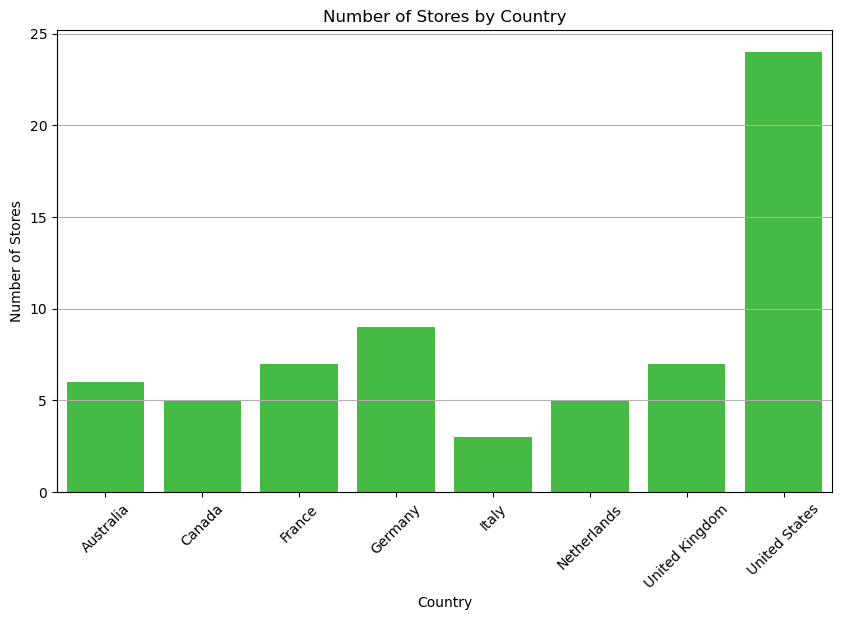

In [113]:
# Bar plot for number of stores across the country 
plt.figure(figsize=(10, 6))
sns.countplot(data=df4, x='Country', color='limegreen') 
plt.title('Number of Stores by Country')
plt.xlabel('Country')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [115]:
#saving cleaned dataset into new csv file
df4.to_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\cleaned_stores.csv", index=False)

### Sales dataset cleaning and basic EDA

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
#load sales raw dataset
df5=pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\Raw_dataset\Sales.csv")

In [108]:
df5

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [110]:
#check the datatypes
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [112]:
#check for null values
df5.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [114]:
#Checking the duplicates value
duplicates=df5.duplicated().sum()
duplicates

0

In [116]:
#changing the datatypes
df5['Order Date'] = pd.to_datetime(df5['Order Date'], format= '%m/%d/%Y')
df5['Delivery Date'] = pd.to_datetime(df5['Delivery Date'], format = '%m/%d/%Y', errors = 'coerce')

In [118]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  13165 non-null  datetime64[ns]
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 4.3+ MB


In [130]:
# Handling the missing values of Delivery date
df5.fillna(pd.NaT, inplace=True)

In [132]:
df5

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,Not Available,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13 00:00:00,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13 00:00:00,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12 00:00:00,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12 00:00:00,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,Not Available,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,2021-02-24 00:00:00,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2021-02-23 00:00:00,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2021-02-23 00:00:00,331277,0,1717,2,CAD


In [134]:
#renaming columns
df5 = df5.rename(columns={'Order Number': 'Order_Number','Line Item':'Line_Item', 'Order Date': 'Order_Date','Delivery Date':'Delivery_Date','Currency Code':'Currency_Code'})

In [136]:
#statistical analysis
df5.describe()

,Order_Number,Line_Item,Order_Date,CustomerKey,StoreKey,ProductKey,Quantity
count,6.288400e+04,62884.000000,62884,6.288400e+04,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,2.164207,2018-11-30 21:21:56.939126016,1.180797e+06,31.802144,1125.859344,3.144790
min,3.660000e+05,1.000000,2016-01-01 00:00:00,3.010000e+02,0.000000,1.000000,1.000000
25%,1.121017e+06,1.000000,2018-01-25 00:00:00,6.808580e+05,8.000000,437.000000,1.000000
50%,1.498016e+06,2.000000,2019-02-06 00:00:00,1.261200e+06,37.000000,1358.000000,2.000000
75%,1.788010e+06,3.000000,2019-11-23 00:00:00,1.686496e+06,53.000000,1650.000000,4.000000
max,2.243032e+06,7.000000,2021-02-20 00:00:00,2.099937e+06,66.000000,2517.000000,10.000000
std,4.532963e+05,1.365170,NaN,5.859634e+05,22.978188,709.244010,2.256371


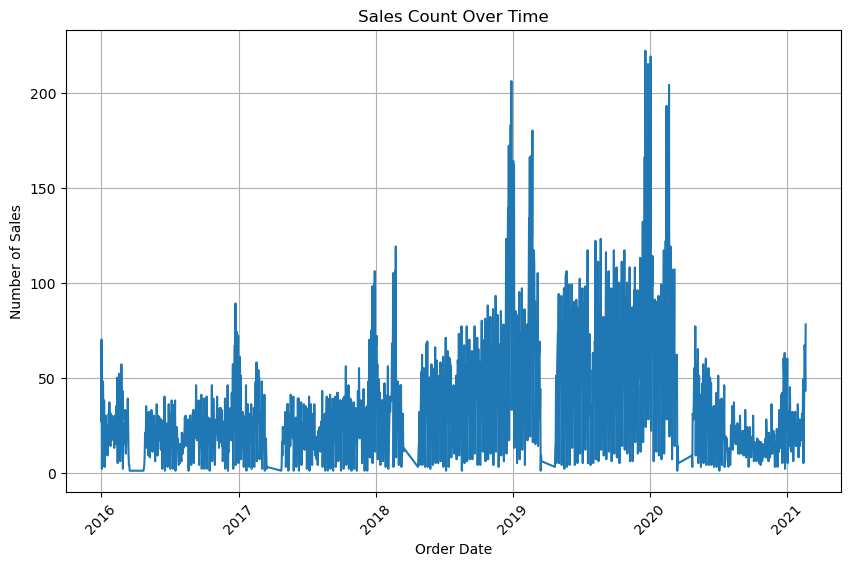

In [138]:
# Grouping by Order Date and counting the number of sales
sales_count_over_time = df5.groupby('Order_Date').agg(sales_count=('Order_Number', 'count')).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_count_over_time, x='Order_Date', y='sales_count')
plt.title('Sales Count Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [144]:
#saving cleaned dataset into new csv file
df5.to_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\cleaned_sales.csv", index=False)

### Merging of datasets

In [147]:
import pandas as pd

In [149]:
# Load all the cleaned datasets
customers = pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\cleaned_customers.csv", encoding='ISO-8859-1')
sales = pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\cleaned_sales.csv")
stores = pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\cleaned_stores.csv")
products = pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\cleaned_products.csv")
exchange_rates = pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\cleaned_exchange.csv")

In [151]:
# Merging dataframes
#merge the sales DataFrame with the customers DataFrame based on the CustomerKey.
merged_data = pd.merge(sales, customers, on="CustomerKey",how="inner")
#the previously merged DataFrame (merged_data) is merged with the products DataFrame based on ProductKey.
merged_data = pd.merge(merged_data, products, on="ProductKey", how="inner")
# merge the current merged_data with the stores DataFrame based on multiple keys: StoreKey, Country, and State.
merged_data = pd.merge(merged_data, stores,on=['StoreKey','Country','State'],how='inner')

In [153]:
merged_data

,Order_Number,Line_Item,Order_Date,Delivery_Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency_Code,Gender,...,Product_Name,Brand,Color,Unit_Cost_USD,Unit_Price_USD,Subcategory,CategoryKey,Category,Square_Meters,Open_Date
0,366005,1,2016-01-01,Not Available,844003,33,421,4,EUR,Male,...,Adventure Works Desktop PC3.0 MS300 Silver,Adventure Works,Silver,215.68,469.00,Desktops,3,Computers,1540.0,2015-12-09
1,367006,1,2016-01-02,Not Available,693285,18,2445,3,EUR,Female,...,Litware 80mm Dual Ball Bearing Case Fan E1001 ...,Litware,Green,2.54,4.99,Fans,8,Home Appliances,310.0,2012-08-08
2,367010,1,2016-01-02,Not Available,1322959,66,917,1,USD,Male,...,SV 500GB USB 2.0 Portable External Hard Drive ...,Southridge Video,White,59.31,179.00,Computers Accessories,3,Computers,840.0,2014-01-01
3,367010,2,2016-01-02,Not Available,1322959,66,39,1,USD,Male,...,Contoso 8GB Clock & Radio MP3 Player X850 Green,Contoso,Green,99.14,299.23,MP4&MP3,1,Audio,840.0,2014-01-01
4,369007,1,2016-01-04,Not Available,571622,20,2510,3,EUR,Male,...,Contoso Original K1m Li-Ion Standard Battery E...,Contoso,White,2.07,4.06,Cell phones Accessories,5,Cell phones,1715.0,2012-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5940,2243014,1,2021-02-20,Not Available,1453427,50,423,1,USD,Male,...,Adventure Works Desktop PC2.30 MD230 Black,Adventure Works,Black,275.46,599.00,Desktops,3,Computers,2000.0,2008-03-06
5941,2243014,2,2021-02-20,Not Available,1453427,50,1617,1,USD,Male,...,Contoso DVD Player M110 Silver,Contoso,Silver,26.67,57.99,Movie DVD,6,"Music, Movies and Audio Books",2000.0,2008-03-06
5942,2243014,3,2021-02-20,Not Available,1453427,50,2506,4,USD,Male,...,Contoso Rubberized Snap-On Cover Hard Case Cel...,Contoso,Pink,2.42,4.74,Cell phones Accessories,5,Cell phones,2000.0,2008-03-06
5943,2243021,1,2021-02-20,Not Available,1783631,55,1147,4,USD,Male,...,Fabrikam Home and vacation moviemaker 2/3'' 17...,Fabrikam,Black,301.21,655.00,Camcorders,4,Cameras and camcorders,2000.0,2009-12-15


In [155]:
#merge the exchange rate information into your previously merged dataset (merged_data)
merged_data = pd.merge(merged_data, exchange_rates,left_on=['Order_Date','Currency_Code'],right_on=['Date','Currency'], how="inner")

In [157]:
merged_data

,Order_Number,Line_Item,Order_Date,Delivery_Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency_Code,Gender,...,Unit_Cost_USD,Unit_Price_USD,Subcategory,CategoryKey,Category,Square_Meters,Open_Date,Date,Currency,exr
0,366005,1,2016-01-01,Not Available,844003,33,421,4,EUR,Male,...,215.68,469.00,Desktops,3,Computers,1540.0,2015-12-09,2016-01-01,EUR,0.9185
1,367006,1,2016-01-02,Not Available,693285,18,2445,3,EUR,Female,...,2.54,4.99,Fans,8,Home Appliances,310.0,2012-08-08,2016-01-02,EUR,0.9185
2,367010,1,2016-01-02,Not Available,1322959,66,917,1,USD,Male,...,59.31,179.00,Computers Accessories,3,Computers,840.0,2014-01-01,2016-01-02,USD,1.0000
3,367010,2,2016-01-02,Not Available,1322959,66,39,1,USD,Male,...,99.14,299.23,MP4&MP3,1,Audio,840.0,2014-01-01,2016-01-02,USD,1.0000
4,369007,1,2016-01-04,Not Available,571622,20,2510,3,EUR,Male,...,2.07,4.06,Cell phones Accessories,5,Cell phones,1715.0,2012-12-15,2016-01-04,EUR,0.9176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5940,2243014,1,2021-02-20,Not Available,1453427,50,423,1,USD,Male,...,275.46,599.00,Desktops,3,Computers,2000.0,2008-03-06,2021-02-20,USD,1.0000
5941,2243014,2,2021-02-20,Not Available,1453427,50,1617,1,USD,Male,...,26.67,57.99,Movie DVD,6,"Music, Movies and Audio Books",2000.0,2008-03-06,2021-02-20,USD,1.0000
5942,2243014,3,2021-02-20,Not Available,1453427,50,2506,4,USD,Male,...,2.42,4.74,Cell phones Accessories,5,Cell phones,2000.0,2008-03-06,2021-02-20,USD,1.0000
5943,2243021,1,2021-02-20,Not Available,1783631,55,1147,4,USD,Male,...,301.21,655.00,Camcorders,4,Cameras and camcorders,2000.0,2009-12-15,2021-02-20,USD,1.0000


In [161]:
#checking for the missing values
merged_data.isnull().sum()

Order_Number      0
Line_Item         0
Order_Date        0
Delivery_Date     0
CustomerKey       0
StoreKey          0
ProductKey        0
Quantity          0
Currency_Code     0
Gender            0
Name              0
City              0
State             0
Country           0
Continent         0
Birthday          0
Age               0
Product_Name      0
Brand             0
Color             0
Unit_Cost_USD     0
Unit_Price_USD    0
Subcategory       0
CategoryKey       0
Category          0
Square_Meters     0
 Open_Date        0
Date              0
Currency          0
exr               0
dtype: int64

In [165]:
#finally checking duplicates
duplicates=merged_data.duplicated().sum()
print(f"number of duplicates found:{duplicates}")

number of duplicates found:0


In [169]:
#finally save the merged datas into a csv file
merged_data.to_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\merged_data.csv", index=False)

## connecting sql using pymysql

In [1]:
# Connecting to the MySQL database, creating a database, setting up tables, and inserting values into those tables using SQL insert queries.
import pymysql

In [3]:
# creating databse called global_Electronics
import pymysql
mydb = pymysql.connect(
       host="localhost",
       user="root",
       password="Ria@3009",
    
)
mycursor=mydb.cursor()
mycursor.execute("CREATE DATABASE Global_Electronics")
mycursor.execute("SHOW DATABASES")
for i in mycursor :
    print(i)

mydb.close()

mydb=pymysql.connect(
    host="localhost",
    user="root",
    password="Ria@3009",
    database='Global_Electronics'
)

('bank',)
('global_electronics',)
('information_schema',)
('mysql',)
('new',)
('performance_schema',)
('red_bus_details',)
('sys',)
('vaazhai',)
('youtube',)


#### creating a table for merged_datasets

In [ ]:
import pymysql
import pandas as pd

# Establish a connection to the MySQL database
myconnection = pymysql.connect(
    host='127.0.0.1',
    user='root',
    passwd='Ria@3009',
    database="Global_Electronics"
)

# Load the CSV data into a DataFrame
merged_data = pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\merged_data.csv")

# Create a string for the table columns
column_definitions = ",".join(
    f"{i} {j}"
    for i, j in zip(merged_data.columns, merged_data.dtypes)
).replace("float64", "FLOAT").replace("object", "VARCHAR(255)").replace("int64", "INT").replace("datetime64[ns]", "DATETIME")

# Define the table name and create the table with an auto-incrementing id
table_name = "global_table"
create_table_query = f"""
CREATE TABLE {table_name} (
    id INT AUTO_INCREMENT PRIMARY KEY,
    {column_definitions}
)
"""

# Execute the table creation query
with myconnection.cursor() as cursor:
    cursor.execute(create_table_query)

# Prepare the insertion query, excluding the id column
insert_query = f"INSERT INTO {table_name} ({', '.join(merged_data.columns)}) VALUES ({', '.join(['%s'] * len(merged_data.columns))})"

# Insert the data into the table
with myconnection.cursor() as cursor:
    for i in range(len(merged_data)):
        cursor.execute(insert_query, tuple(merged_data.iloc[i]))
    myconnection.commit()

# Close the connection
myconnection.close()


In [5]:
mydb=pymysql.connect(
    host="localhost",
    user="root",
    password="Ria@3009",
    database='Global_Electronics'
)

#### creating a table for cleaned customer dataset

In [15]:
import pymysql
import pandas as pd

# Establish a connection to the MySQL database
myconnection = pymysql.connect(
    host='127.0.0.1',
    user='root',
    passwd='Ria@3009',
    database="Global_Electronics"
)

# Load the CSV data into a DataFrame
customers = pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\cleaned_customers.csv")

# Create a string for the table columns
column_definitions = ",".join(
    f"{i} {j}"
    for i, j in zip(customers.columns, customers.dtypes)
).replace("float64", "FLOAT").replace("object", "VARCHAR(255)").replace("int64", "INT").replace("datetime64[ns]", "DATETIME")

# Define the table name and create the table with an auto-incrementing id
table_name = "customer_table"
create_table_query = f"""
CREATE TABLE {table_name} (
    id INT AUTO_INCREMENT PRIMARY KEY,
    {column_definitions}
)
"""

# Execute the table creation query
with myconnection.cursor() as cursor:
    cursor.execute(create_table_query)

# Prepare the insertion query, excluding the id column
insert_query = f"INSERT INTO {table_name} ({', '.join(customers.columns)}) VALUES ({', '.join(['%s'] * len(customers.columns))})"

# Insert the data into the table
with myconnection.cursor() as cursor:
    for i in range(len(customers)):
        cursor.execute(insert_query, tuple(customers.iloc[i]))
    myconnection.commit()

# Close the connection
myconnection.close()


#### creating table for cleaned sales dataset

In [22]:
import pymysql
import pandas as pd

# Establish a connection to the MySQL database
myconnection = pymysql.connect(
    host='127.0.0.1',
    user='root',
    passwd='Ria@3009',
    database="Global_Electronics"
)

# Load the CSV data into a DataFrame
sales = pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\cleaned_sales.csv")

# Create a string for the table columns
column_definitions = ",".join(
    f"{i} {j}"
    for i, j in zip(sales.columns, sales.dtypes)  # Updated to use 'sales'
).replace("float64", "FLOAT").replace("object", "VARCHAR(255)").replace("int64", "INT").replace("datetime64[ns]", "DATETIME")

# Define the table name and create the table with an auto-incrementing id
table_name = "sales_table"  # Ensure the table name reflects the data it will hold
create_table_query = f"""
CREATE TABLE {table_name} (
    id INT AUTO_INCREMENT PRIMARY KEY,
    {column_definitions}
)
"""

# Execute the table creation query
with myconnection.cursor() as cursor:
    cursor.execute(create_table_query)

# Prepare the insertion query, excluding the id column
insert_query = f"INSERT INTO {table_name} ({', '.join(sales.columns)}) VALUES ({', '.join(['%s'] * len(sales.columns))})"

# Insert the data into the table
with myconnection.cursor() as cursor:
    for i in range(len(sales)):
        cursor.execute(insert_query, tuple(sales.iloc[i]))
    myconnection.commit()

# Close the connection
myconnection.close()


#### creating table for cleaned products dataset

In [29]:
import pymysql
import pandas as pd

# Establish a connection to the MySQL database
myconnection = pymysql.connect(
    host='127.0.0.1',
    user='root',
    passwd='Ria@3009',
    database="Global_Electronics"
)

# Load the CSV data into a DataFrame
products = pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\cleaned_products.csv")

# Create a string for the table columns, excluding ProductKey from the column definitions
column_definitions = ",".join(
    f"{i} {j}"
    for i, j in zip(products.columns, products.dtypes)
    if i != 'ProductKey'  # Exclude ProductKey from column definitions
).replace("float64", "FLOAT").replace("object", "VARCHAR(255)").replace("int64", "INT").replace("datetime64[ns]", "DATETIME")

# Define the table name and create the table with ProductKey as the primary key
table_name = "products_table"
create_table_query = f"""
CREATE TABLE {table_name} (
    ProductKey INT PRIMARY KEY,
    {column_definitions}
)
"""

# Execute the table creation query
with myconnection.cursor() as cursor:
    cursor.execute(create_table_query)

# Prepare the insertion query
insert_query = f"INSERT INTO {table_name} ({', '.join(products.columns)}) VALUES ({', '.join(['%s'] * len(products.columns))})"

# Insert the data into the table
with myconnection.cursor() as cursor:
    for i in range(len(products)):
        cursor.execute(insert_query, tuple(products.iloc[i]))
    myconnection.commit()

# Close the connection
myconnection.close()


#### creating a table from cleaned stores dataset

In [32]:
import pymysql
import pandas as pd

# Establish a connection to the MySQL database
myconnection = pymysql.connect(
    host='127.0.0.1',
    user='root',
    passwd='Ria@3009',
    database="Global_Electronics"
)

# Load the CSV data into a DataFrame
stores = pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\cleaned_stores.csv")

# Create a string for the table columns, excluding StoreKey from the column definitions
column_definitions = ",".join(
    f"{i} {j}"
    for i, j in zip(stores.columns, stores.dtypes)  # Use 'stores' DataFrame
    if i != 'StoreKey'  # Exclude StoreKey from column definitions
).replace("float64", "FLOAT").replace("object", "VARCHAR(255)").replace("int64", "INT").replace("datetime64[ns]", "DATETIME")

# Define the table name and create the table with StoreKey as the primary key
table_name = "stores_table"
create_table_query = f"""
CREATE TABLE {table_name} (
    StoreKey INT PRIMARY KEY,
    {column_definitions}
)
"""

# Execute the table creation query
with myconnection.cursor() as cursor:
    cursor.execute(create_table_query)

# Prepare the insertion query
insert_query = f"INSERT INTO {table_name} ({', '.join(stores.columns)}) VALUES ({', '.join(['%s'] * len(stores.columns))})"

# Insert the data into the table
with myconnection.cursor() as cursor:
    for i in range(len(stores)):
        cursor.execute(insert_query, tuple(stores.iloc[i]))
    myconnection.commit()

# Close the connection
myconnection.close()


#### creating a table from cleaned Exchange_rate dataset

In [36]:
import pymysql
import pandas as pd

# Establish a connection to the MySQL database
myconnection = pymysql.connect(
    host='127.0.0.1',
    user='root',
    passwd='Ria@3009',
    database="Global_Electronics"
)

# Load the CSV data into a DataFrame
exchange = pd.read_csv(r"C:\Users\DURGA\Desktop\project 2_Data_Spark\cleaned_data_set\cleaned_exchange.csv")

# Create a string for the table columns
column_definitions = ",".join(
    f"{i} {j}"
    for i, j in zip(exchange.columns, exchange.dtypes)  # Use 'exchange' DataFrame
).replace("float64", "FLOAT").replace("object", "VARCHAR(255)").replace("int64", "INT").replace("datetime64[ns]", "DATETIME")

# Define the table name and create the table with an auto-incrementing id
table_name = "exchange_table"
create_table_query = f"""
CREATE TABLE {table_name} (
    id INT AUTO_INCREMENT PRIMARY KEY,
    {column_definitions}
)
"""

# Execute the table creation query
with myconnection.cursor() as cursor:
    cursor.execute(create_table_query)

# Prepare the insertion query, excluding the id column
insert_query = f"INSERT INTO {table_name} ({', '.join(exchange.columns)}) VALUES ({', '.join(['%s'] * len(exchange.columns))})"

# Insert the data into the table
with myconnection.cursor() as cursor:
    for i in range(len(exchange)):
        cursor.execute(insert_query, tuple(exchange.iloc[i]))
    myconnection.commit()

# Close the connection
myconnection.close()
